In [17]:
import sys
import os
from os.path import dirname, realpath, join
base_dir = dirname(dirname(dirname(os.getcwd())))
import itertools
import pandas as pd
from os.path import join
base_dir

'/Users/haithamelmarakeby/PycharmProjects/pnet2'

In [18]:
sys.path.insert(0, base_dir)
from config_path import PROSTATE_DATA_PATH, PLOTS_PATH
from data.data_access import Data

## get P1000 data

In [19]:
selected_genes = ['AR', 'TP53', 'MDM4', 'CDK4', 'CDK6', 'CDKN2A', 'RB1']
data_params =  {'data_type': ['mut_important', 'cnv_del', 'cnv_amp'],
                 'drop_AR': False,
                 'cnv_levels': 5,
                 'mut_binary': True,
                 'balanced_data': False,
                 'combine_type': 'union',  # intersection
                 'use_coding_genes_only': False,
                 'selected_genes': selected_genes}

data_access_params= {'id': 'id', 'type': 'prostate_paper', 'params': data_params}

In [20]:
data_adapter = Data(**data_access_params)
x, y, info, columns = data_adapter.get_data()
x_df = pd.DataFrame(x, columns= columns, index= info)
x_df.head()

CDKN2A                          TP53                  \
               mut_important cnv_del cnv_amp mut_important cnv_del cnv_amp   
00-029N9_LN              0.0     0.0     0.0           0.0     0.5     0.0   
01-087MM_BONE            0.0     0.0     0.0           0.0     0.0     0.0   
01-095N1_LN              0.0     0.0     0.0           0.0     0.5     0.0   
01-120A1_LIVER           0.0     0.0     0.0           0.0     0.5     0.0   
02-083E1_LN              0.0     0.0     0.0           0.0     0.0     0.0   

                         RB1                            AR   ...            \
               mut_important cnv_del cnv_amp mut_important   ...   cnv_amp   
00-029N9_LN              0.0     0.5     0.0           0.0   ...       0.0   
01-087MM_BONE            0.0     0.0     0.0           1.0   ...       0.0   
01-095N1_LN              0.0     0.5     0.0           0.0   ...       0.0   
01-120A1_LIVER           0.0     0.5     0.0           0.0   ...       0.0   
02-083E1_LN              0.0     0.5     0.0           0.0   ...       0.5   

                        CDK4                          CDK6                  \
               mut_important cnv_del cnv_amp mut_important cnv_del cnv_amp   
00-029N9_LN              0.0     0.0     0.0           0.0     0.0     0.0   
01-087MM_BONE            0.0     0.0     0.5           0.0     0.0     0.0   
01-095N1_LN              0.0     0.0     0.0           0.0     0.0     0.0   
01-120A1_LIVER           0.0     0.0     0.0           0.0     0.0     0.0   
02-083E1_LN              0.0     0.0     0.0           0.0     0.0     0.0   

                        MDM4                  
               mut_important cnv_del cnv_amp  
00-029N9_LN              0.0     0.0     0.0  
01-087MM_BONE            0.0     0.0     0.0  
01-095N1_LN              0.0     0.0     0.0  
01-120A1_LIVER           0.0     0.0     0.0  
02-083E1_LN              0.0     0.0     0.5  

[5 rows x 21 columns]

In [21]:
x_df_3= x_df.copy()
x_df_3[x_df_3<1] = 0 #remove single copy

x_df_3 = x_df_3.T.reset_index().groupby('level_0').sum() # all events (OR)
x_df_3[x_df_3>0] = 1 # binarize 
x_df_3.shape

(7, 1011)

In [39]:
x_df_3_binary = x_df_3.T>0.
x_df_3_binary = x_df_3_binary.set_index(selected_genes)

In [23]:
y_ind = y>0
x_df_mets_3 = x_df_3.T[y_ind].T

In [24]:
x_df_mets_3

,00-029N9_LN,01-087MM_BONE,01-095N1_LN,01-120A1_LIVER,02-083E1_LN,03-082H1_LIVER,03-130L_RETROPERITONEAL,03-139E3_RETROPERITONEAL,03-163S4_LIVER,03-192B_LUNG,...,TP_2032,TP_2034,TP_2054,TP_2060,TP_2061,TP_2064,TP_2069,TP_2077,TP_2078,TP_2079
level_0,,,,,,,,,,,,,,,,,,,,,
AR,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
CDK4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CDK6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CDKN2A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MDM4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
RB1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
TP53,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [25]:
x_df_mets_3_binary = x_df_mets_3.T>0.
x_df_mets_3_binary.shape

(333, 7)

In [27]:
x_df_mets_3_binary = x_df_mets_3_binary.set_index(selected_genes)

## UpSet plot for all selected genes (mets only 333 samples)

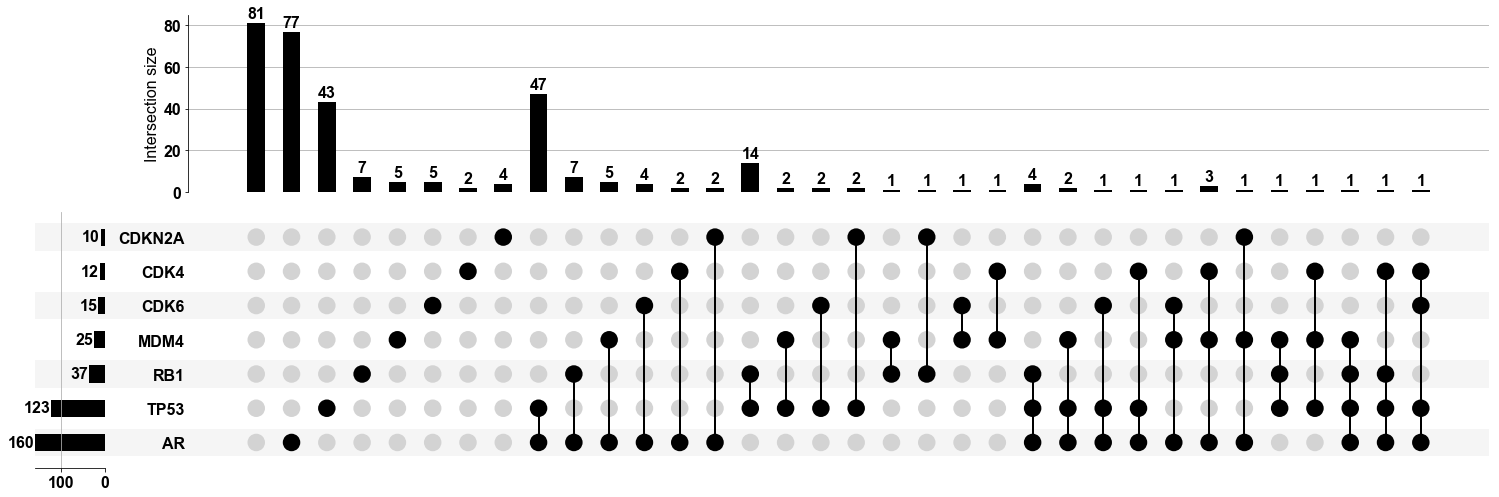

In [156]:
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

upset = UpSet(x_df_mets_3_binary, subset_size='count', intersection_plot_elements=5,  show_counts=True, with_lines=True , element_size=50)
upset.plot()
plt.savefig('upset_mets_only.png')
plt.show()

## UpSet plot for all selected genes (all samples)

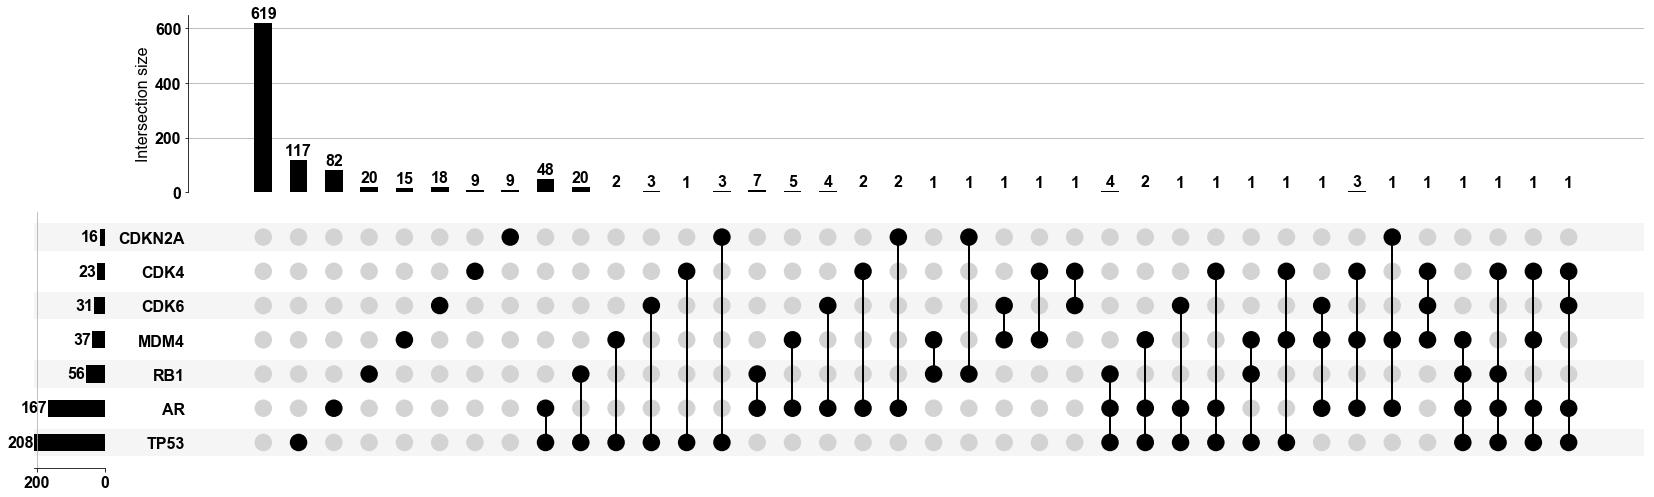

In [163]:

import matplotlib 

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

upset = UpSet(x_df_3_binary, subset_size='count', intersection_plot_elements=5, show_counts=True, with_lines=True , element_size=50)
upset.plot()
plt.savefig('upset_all.png', dpi=200)
plt.show()


## UpSet plot for (AR, TP53, MDM4) (all samples)


In [166]:
dd = x_df_3_binary.reset_index().set_index(['AR','TP53','MDM4'])

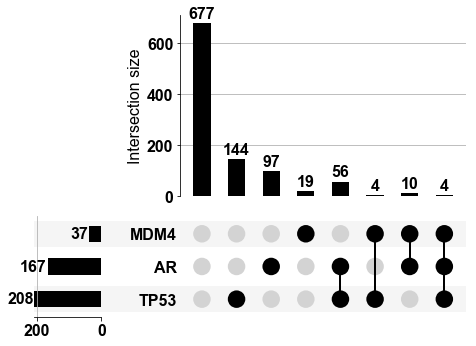

In [167]:
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

upset = UpSet(dd, subset_size='count', intersection_plot_elements=5, show_counts=True, with_lines=True , element_size=50)
upset.plot()
plt.savefig('ar_tp53_mdm4.png', dpi=200)
plt.show()


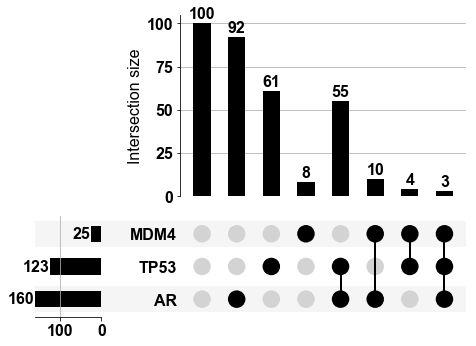

In [184]:
dd = x_df_mets_3_binary.reset_index().set_index(['AR','TP53','MDM4'])

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

upset = UpSet(dd, subset_size='count', intersection_plot_elements=5, show_counts=True, with_lines=True , element_size=50)
upset.plot()
plt.savefig('ar_tp53_mdm4_mets.png', dpi=200)
plt.show()


## PAN-cancer (MET500)

In [168]:
external_dir = join(PROSTATE_DATA_PATH, 'external_validation/Met500')
external_dir

'/Users/haithamelmarakeby/PycharmProjects/pnet2/_database/prostate/external_validation/Met500'

In [169]:
mut_df_ext = pd.read_csv(join(external_dir, 'Met500_mut_matrix.csv'), index_col=0)
mut_df_ext.index = mut_df_ext.index.str.split('.', 1).str[0]
mut_df_ext.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Pipeline_ID,,,,,,,,,,,,,,,,,,,,,
ES_5001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ES_5004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ES_5005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MO_1001,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MO_1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [170]:
mut_df_ext_selected = mut_df_ext.loc[:, selected_genes].copy()
mut_df_ext_selected.fillna(0, inplace=True)
mut_df_ext_selected.head()

,AR,TP53,MDM4,CDK4,CDK6,CDKN2A,RB1
Pipeline_ID,,,,,,,
ES_5001,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ES_5004,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ES_5005,0.0,1.0,0.0,0.0,0.0,0.0,0.0
MO_1001,0.0,1.0,0.0,0.0,0.0,0.0,0.0
MO_1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
cnv_df_ext = pd.read_csv(join(external_dir, 'Met500_cnv.txt'), sep='\t', index_col=0)
cnv_df_ext_selected = cnv_df_ext.T.loc[:, selected_genes].copy()

cnv_df_ext_selected = cnv_df_ext_selected.replace({-1.0: 0., -2.0:1.0, 1.0: 0., 2.0:1.})
cnv_df_ext_selected.fillna(0.0, inplace=True)
cnv_df_ext_selected.head()

gene,AR,TP53,MDM4,CDK4,CDK6,CDKN2A,RB1
ES_5001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ES_5004,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ES_5005,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MO_1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MO_1002,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [173]:
met500_data = pd.concat([mut_df_ext_selected, cnv_df_ext_selected], keys=['mut', 'cnv'], join='inner', axis=1 )

In [174]:
met500_df_3 = met500_data.T.reset_index().groupby('level_1').sum() # all events (OR)
met500_df_3[met500_df_3>0] = 1 # binarize 
met500_df_3.shape

(7, 500)

In [176]:
met500_df_3.head()

Pipeline_ID,ES_5001,ES_5004,ES_5005,MO_1001,MO_1002,MO_1005,MO_1007,MO_1008,MO_1011,MO_1012,...,TP_2109,TP_2118,TP_2119,TP_2120,TP_2122,TP_2123,TP_2130,TP_2131,TP_2141,TP_2156
level_1,,,,,,,,,,,,,,,,,,,,,
AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CDK4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CDK6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CDKN2A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
MDM4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [177]:
met500_df_3 = met500_df_3.T>0.
met500_df_3 = met500_df_3.set_index(selected_genes)

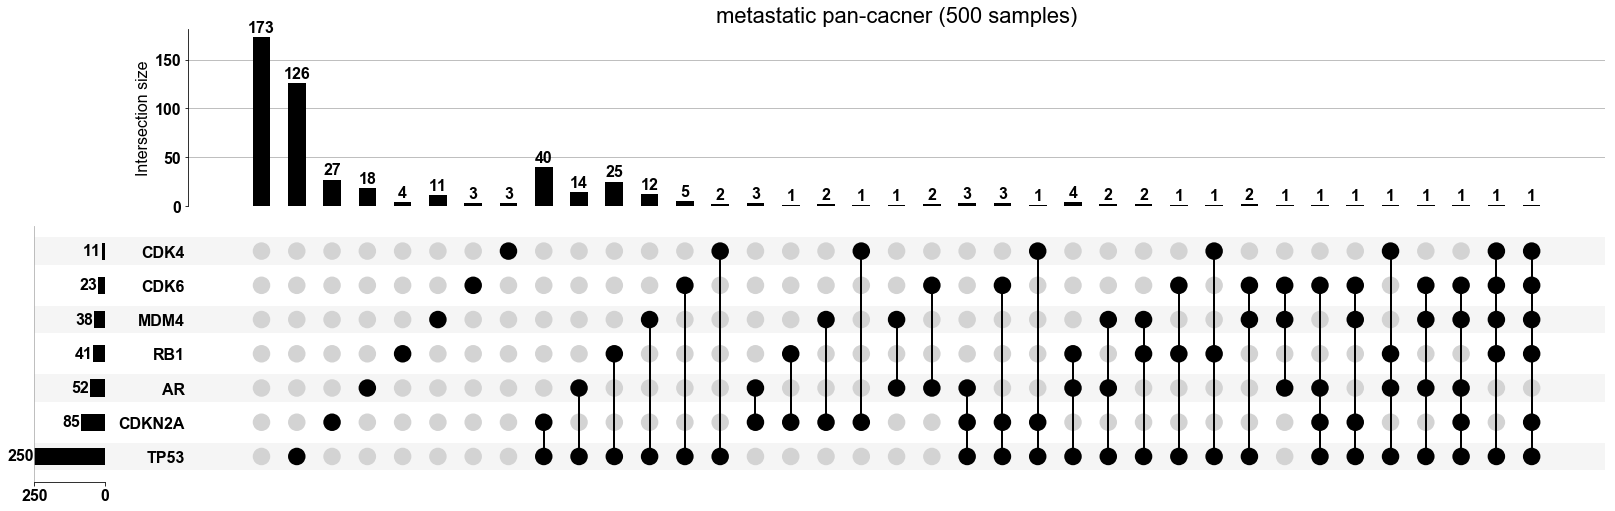

In [183]:
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

upset = UpSet(met500_df_3, subset_size='count', intersection_plot_elements=5, show_counts=True, with_lines=True , element_size=50)
upset.plot()
plt.title('metastatic pan-cacner (500 samples)', fontsize=22)
plt.savefig('met500.png', dpi=200)
plt.show()
